#### Linear Regression Boston Housing
Oct 21, 2019

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

%matplotlib inline

#### Load the Boston Data

In [3]:
from sklearn.datasets import load_boston

boston_raw = load_boston()
boston_raw.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(boston_raw.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston = pd.DataFrame(data=boston_raw.data, columns=boston_raw.feature_names)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['PRICE'] = boston_raw.target

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [11]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Few Observations:
* no missing data
* all data are numeric, no categorical data
* looking at at mean values of each features we can see that they have different scale

#### Get the correlation of each columns/fields

In [27]:
correlation = boston.corr()['PRICE'].drop('PRICE')
print(correlation.sort_values(kind='quicksort', ascending=False))

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64


#### Plotting correlation heatmap

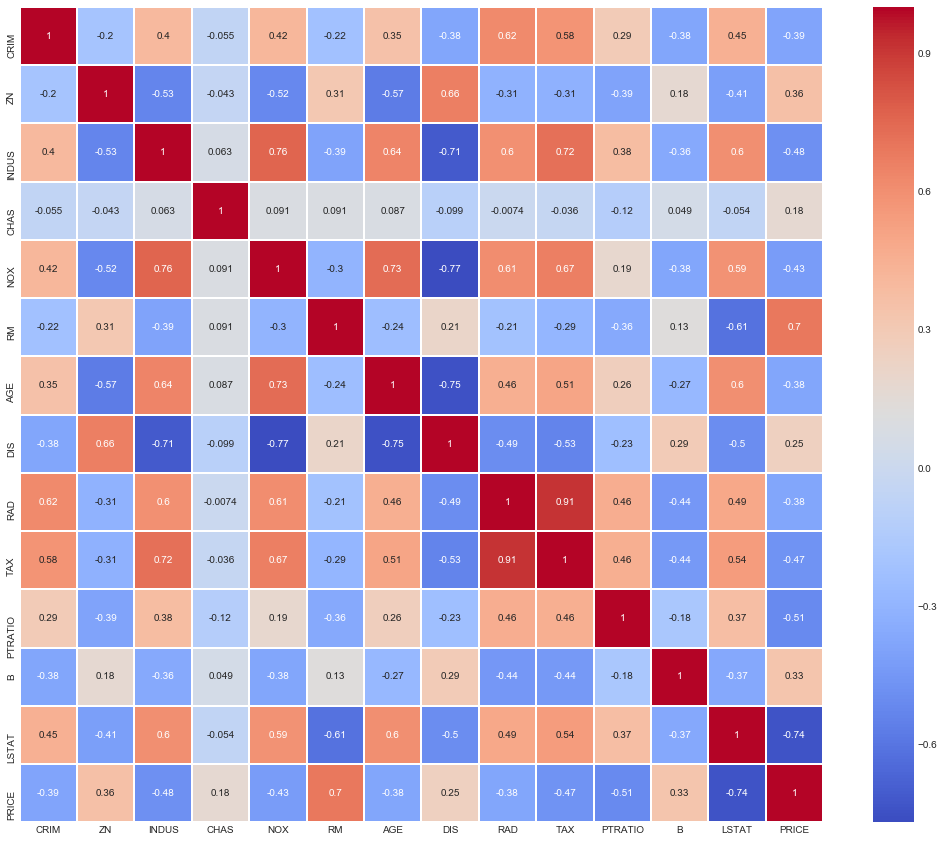

In [28]:
plt.figure(figsize=(18,15))
sns.heatmap(boston.corr(),linewidth=1, annot=True, cmap='coolwarm')

From the correlation result, it shows that RM and LSTAT has a high positive and negative correlation respectively

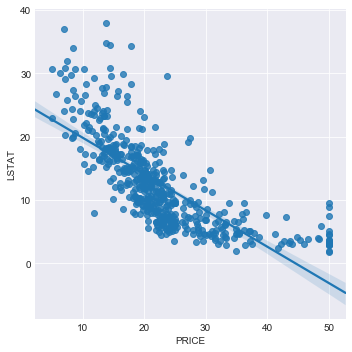

In [25]:
sns.set_style('darkgrid')
sns.lmplot(x='PRICE',y='LSTAT', data=boston,  fit_reg=True)

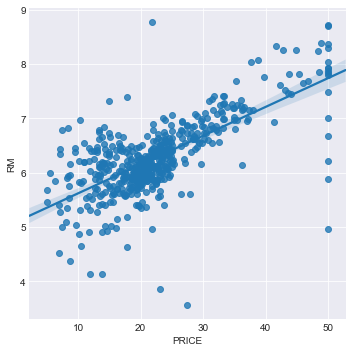

In [26]:
sns.lmplot(x='PRICE',y='RM', data=boston,  fit_reg=True)

### Machine Learning Model Creation

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### Split the dataset set to have a training and test data

In [39]:
X = boston.drop('PRICE', axis=1)
y = boston.PRICE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##### Create the Linear Regression Model

In [41]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Make prediction on the test data

In [43]:
pred = linReg.predict(X_test)
pred

array([28.65507152, 36.50208976, 15.41877538, 25.4123428 , 18.84504144,
       23.15193132, 17.39045794, 14.07068504, 23.04106392, 20.5997909 ,
       24.82848981, 18.52972656, -6.89338718, 21.80647623, 19.23044706,
       26.18284059, 20.28099565,  5.61147028, 40.44518211, 17.57213704,
       27.44750834, 30.17592819, 10.92939394, 24.0192381 , 18.06277152,
       15.93524273, 23.13784817, 14.49181123, 22.33889889, 19.32732276,
       22.1740459 , 25.19724098, 25.31414125, 18.51391365, 16.60898647,
       17.48281643, 30.95248869, 20.19196715, 23.90566388, 24.87331497,
       13.93612301, 31.82414012, 42.56492347, 17.62944481, 27.02392519,
       17.1891161 , 13.79929973, 26.10739476, 20.31403576, 30.09296805,
       21.31686534, 34.1606385 , 15.59905068, 26.11282476, 39.31618827,
       22.99094172, 18.95021816, 33.05721471, 24.85373006, 12.91490043,
       22.67333429, 30.795732  , 31.63743635, 16.28548951, 21.06900792,
       16.58193817, 20.35778853, 26.16063538, 31.07034018, 11.92

In [44]:
linReg.coef_

array([-1.32774155e-01,  3.57812335e-02,  4.99454423e-02,  3.12127706e+00,
       -1.54698463e+01,  4.04872721e+00, -1.07515901e-02, -1.38699758e+00,
        2.42353741e-01, -8.69095363e-03, -9.11917342e-01,  1.19435253e-02,
       -5.48080157e-01])

In [45]:
linReg.intercept_

31.682148582134218

##### Model evaluation with R2_score

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7109203586326318